#### Reproject and Coadd

In [22]:
from MIRI import *
from reproject import reproject_exact
from reproject.mosaicking import reproject_and_coadd

def reproj_coadd(instrument, _filter, obs_num):
    images = [fits.open(i)[1] for i in sorted(glob.glob(f"/mnt/C/JWST/COSMOS/{instrument}/{_filter}/o{obs_num}/*.fits"))]

    # 2. Align the Images
    reference_wcs = images[0].header
    aligned_images, footprint = reproject_and_coadd(
                                                    images, 
                                                    output_projection=reference_wcs, 
                                                    reproject_function=reproject_exact,
                                                    combine_function='mean', 
                                                    match_background=True
                                                    )

    image_visualization([aligned_images, footprint], auto_color=True, color_style='viridis')
    
reproj_coadd("MIRI", "F770W", "043")

#### Test Pipeline 3 Results

In [1]:
from MIRI import run_Pipeline_3
import glob

all_path = sorted(glob.glob(f"/mnt/C/JWST/COSMOS/MIRI/F770W/o*"))

for path in all_path:
    obs_num = path.split('/')[-1].strip('o')
    # if obs_num in ['043', '044', '045', '046', '047', '048']:
    #     run_Pipeline_3("MIRI", "F770W", obs_num, "bri_col_sub")
    if obs_num in ['009']:
        run_Pipeline_3("MIRI", "F770W", obs_num, "bri_col_sub")

    break


ModuleNotFoundError: No module named 'yaml'

#### 1/F Noise fits Files 

Detector reading: image
No EXTNAME found for this HDU
HDU extension name: SCI
HDU extension name: ERR
HDU extension name: DQ
HDU extension name: VAR_POISSON
HDU extension name: VAR_RNOISE
HDU extension name: ASDF


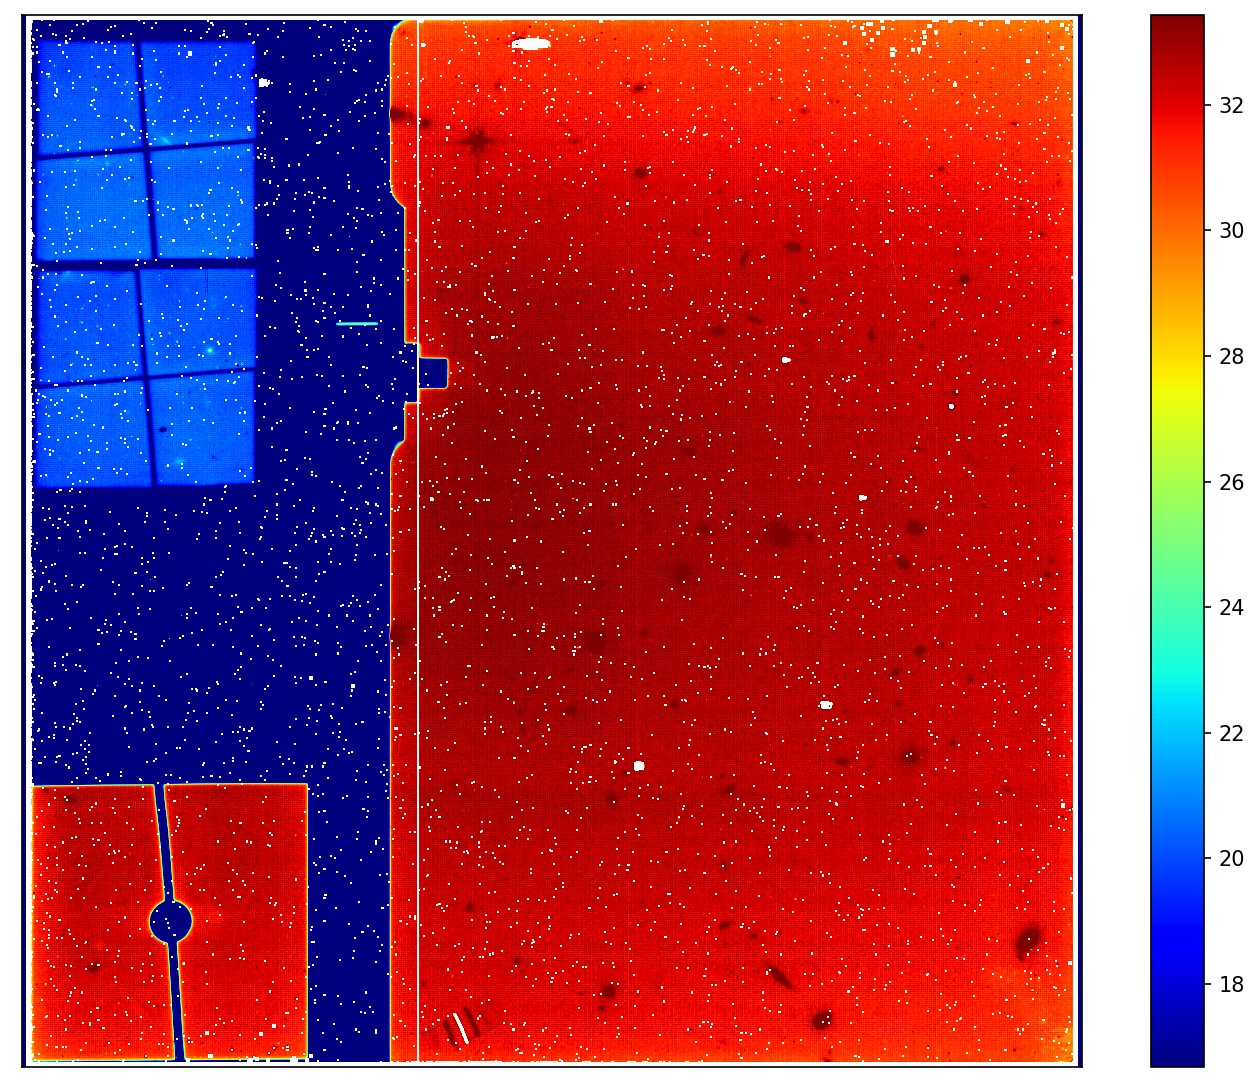

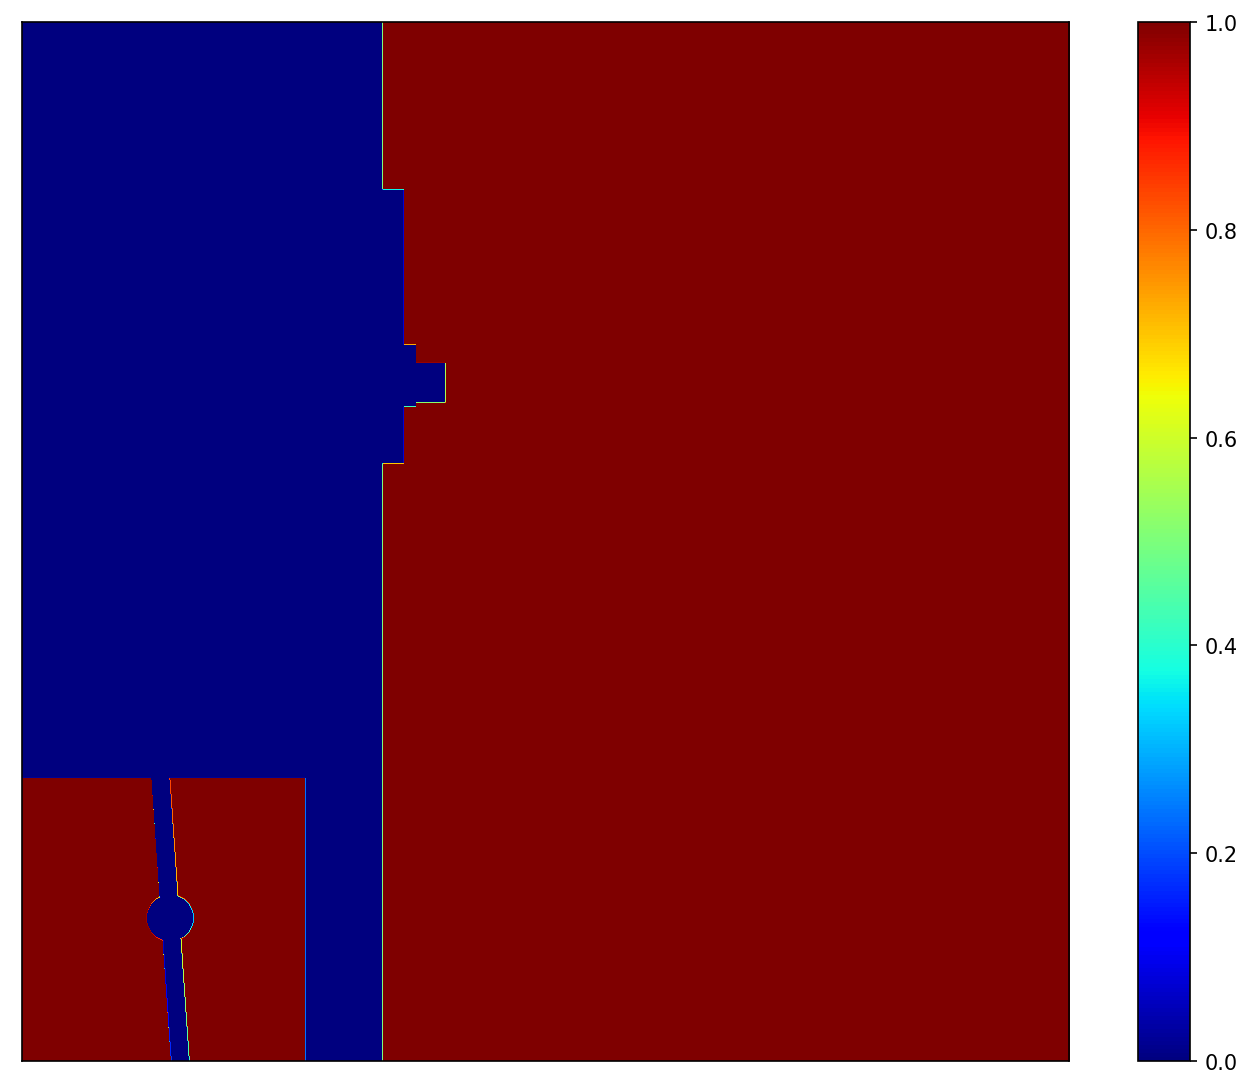

In [4]:
from MIRI import *
from utility import *
data = fits_reader("/mnt/C/JWST/COSMOS/MIRI/F770W/jw01727009001_02201_00002_mirimage/jw01727009001_02201_00002_mirimage_rate.fits")['image']
image_visualization([data['SCI']])
image_visualization(fits.open("/mnt/C/JWST/COSMOS/MIRI/MIRI_eff_area_zeros.fits")[1].data)

#### wisp correction results

In [ ]:
from MIRI import *

# sort_wisp_corrected_images("MIRI", "F770W")

all_path = sorted(glob.glob(f"/mnt/C/JWST/COSMOS/MIRI/F770W/jw*/jw*_cor_wsp.fits"))

for file_name in all_path:
    strs = file_name.split("/")[:-1]
    file_path = "/".join(strs)
    cor_wisp = fits_reader(file_name)['image']['SCI']
    image_visualization(cor_wisp, auto_color=True, share_scale=True, show=False,
                            vmin_value=50, vmax_value=95, img_dpi=300, scale_data=multiply_by_miri_effective_area(cor_wisp, nan=True),
                            save=True, output_path=f'{file_path}/cor_wsp_image.png',)
    break

#### Check How Many Files Are Reduced

In [ ]:
files_to_be_reduced = sorted(glob.glob(f'./F770W/jw*/*uncal.fits'))
__ = []

for fits_file in files_to_be_reduced:

    fits_file = fits_file.split('/')[-1]
    folder_name = remove_file_suffix(fits_file)
    if os.path.exists(f"/mnt/C/JWST/COSMOS/MIRI/F770W/{folder_name}/{folder_name}_cal.fits"):
        __.append(fits_file)

print(f"Finished Task:{np.round(len(__)/len(files_to_be_reduced)*100, 3)}%")

#### Extract MIRI Effective Area

Detector reading: image
No EXTNAME found for this HDU
HDU extension name: SCI
HDU extension name: ERR
HDU extension name: DQ
HDU extension name: AREA
HDU extension name: VAR_POISSON
HDU extension name: VAR_RNOISE
HDU extension name: VAR_FLAT
HDU extension name: ASDF


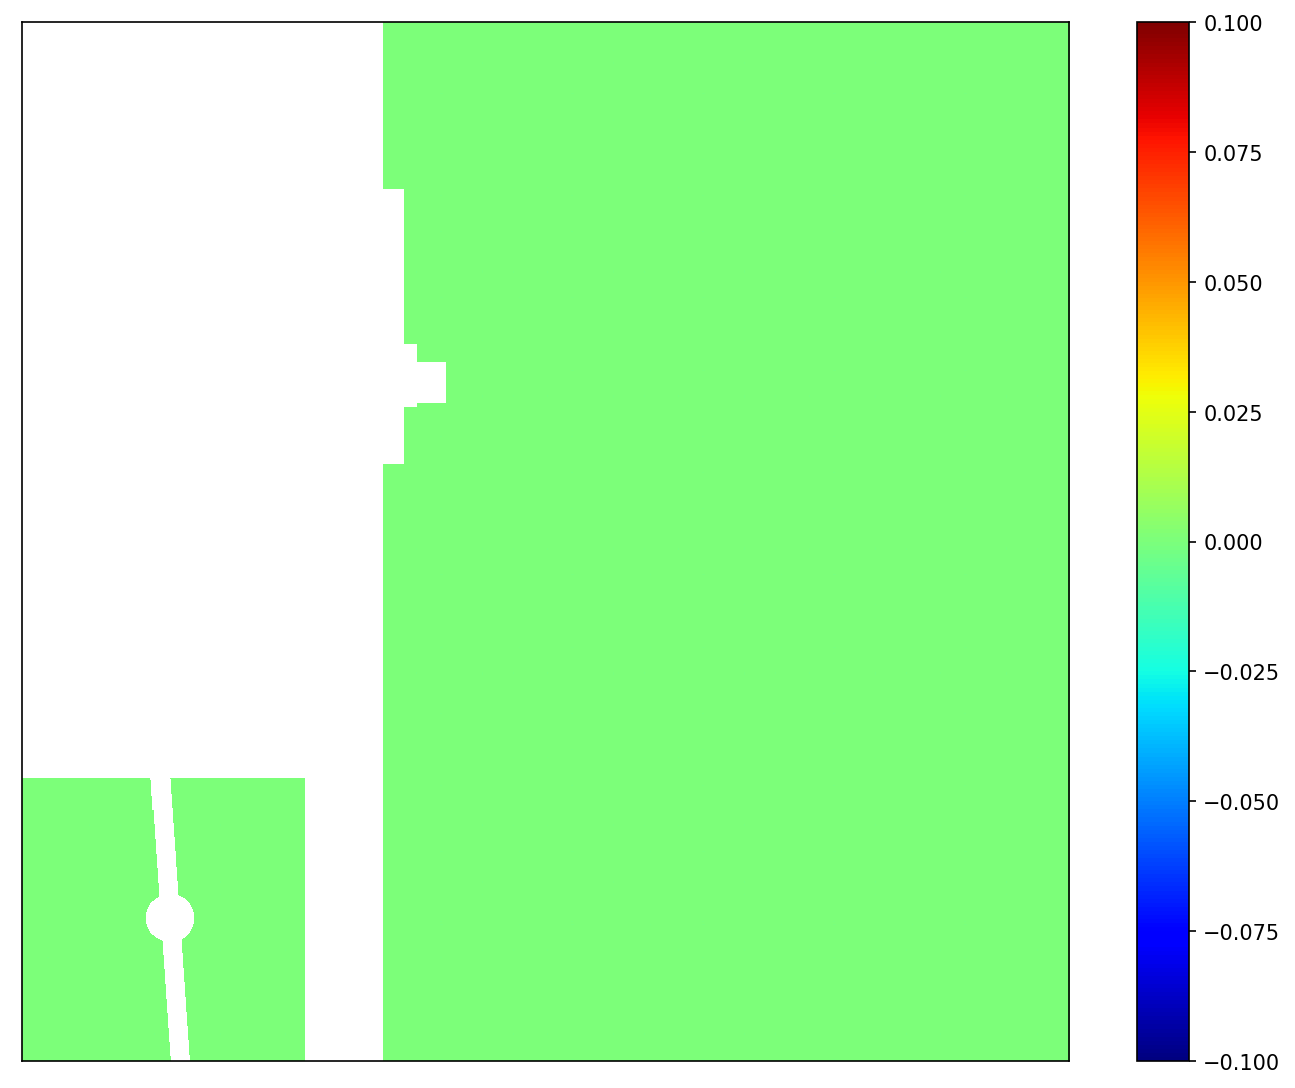

In [1]:
from utility import extract_miri_effective_area
extract_miri_effective_area()

#### Test Wisp Results

In [ ]:
import warnings
warnings.filterwarnings("ignore", module="photutils")
warnings.filterwarnings("ignore", module="astropy")
warnings.filterwarnings("ignore", module="numpy")


from MIRI import MIRI_Image

from utility import *

from pink_noise import *

import glob


files_to_be_reduced = sorted(glob.glob(rf"/mnt/C/JWST/COSMOS/MIRI/F770W/jw*/*_uncal.fits"))


for fits_file in files_to_be_reduced:
    fits_file = fits_file.split('/')[-1]
    folder_name = remove_file_suffix(fits_file)

    # print("No results found, starting Pipeline 1")
    a = MIRI_Image("F770W", filename=fits_file)
    # a.run_MIRI_Detector1Pipeline()
    # a.run_MIRI_Image2Pipeline()
    # a.remove_pink_noise()
    a.wisp_removal(visualize_frames=False, 
                   visualize_template=False, 
                   include_stars=False, conv=True)

#### Elevated Columns of Bright Sources

In [2]:
import warnings
warnings.filterwarnings("ignore", module="photutils")
warnings.filterwarnings("ignore", module="astropy")
warnings.filterwarnings("ignore", module="numpy")
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib.pyplot")

from MIRI import MIRI_Image
from astropy.convolution import Box2DKernel

from utility import *
from pink_noise import *

import glob

files_to_be_reduced = sorted(glob.glob(rf"/mnt/C/JWST/COSMOS/MIRI/F770W/jw*/*_uncal.fits"))

for fits_file in files_to_be_reduced:
    fits_file = fits_file.split('/')[-1]
    folder_name = remove_file_suffix(fits_file)

    # print("No results found, starting Pipeline 1")
    a = MIRI_Image("F770W", filename=fits_file)
    break

data_dict = a.load_corrected_data()

Initializing MIRI Obj. for: ./F770W/jw01727009001_02201_00001_mirimage/jw01727009001_02201_00001_mirimage_uncal.fits
Observation: o009 Visit: 001 Detector: mirimage
MIRI Obj. Initialized successfully.


In [5]:
a.subtract_brighten_columns()

#### SEx result from cor_cal and cor_wsp

In [ ]:
from source_catalog import make_photutil_catalog
import matplotlib.patches as patches

from utility import *

from pink_noise import *

import glob

files_to_be_reduced = sorted(glob.glob(rf"/mnt/C/JWST/COSMOS/MIRI/F770W/jw*/*_uncal.fits"))

for fits_file in files_to_be_reduced:
    fits_file = fits_file.split('/')[-1]
    folder_name = remove_file_suffix(fits_file)

    _, cal_cat_df = make_photutil_catalog(f"/mnt/C/JWST/COSMOS/MIRI/F770W/{folder_name}/{folder_name}_cor_cal.fits", 
                                    save_cat=f"/mnt/C/JWST/COSMOS/MIRI/F770W/Test_cal_cat.csv")
    __, wsp_cat_df = make_photutil_catalog(f"/mnt/C/JWST/COSMOS/MIRI/F770W/{folder_name}/{folder_name}_cor_wsp.fits", 
                                    save_cat=f"/mnt/C/JWST/COSMOS/MIRI/F770W/Test_wsp_cat.csv")

    image_cal, error_cal, wcs_cal = load_fits(f"/mnt/C/JWST/COSMOS/MIRI/F770W/{folder_name}/{folder_name}_cor_cal.fits")
    image_wsp, error_wsp, wcs_wsp = load_fits(f"/mnt/C/JWST/COSMOS/MIRI/F770W/{folder_name}/{folder_name}_cor_wsp.fits")
    
    break

In [ ]:
def compare_sources(image_data, projection_wcs, cal_cat_df, wsp_cat_df):
    fig = plt.figure(figsize=(10, 10), dpi=350)
    ax = plt.subplot(projection=projection_wcs)

    vmin=np.nanpercentile(image_data.flatten(), 45)
    vmax=np.nanpercentile(image_data.flatten(), 95)

    # Creating the image plot
    im = ax.imshow(image_data, origin='lower', cmap='Purples',
                    vmin=vmin, vmax=vmax)

    # Adding a colorbar
    cbar = plt.colorbar(im, fraction=0.046, pad=0.04)
    cbar.set_label('Intensity')

    # coordinate overlay 
    overlay = ax.get_coords_overlay('fk5')
    overlay.grid(color='magenta', ls='dotted', lw=2.5)

    # Scatter plot of sources
    x, y = wcs_wsp.all_world2pix(cal_cat_df['sky_centroid.ra'], cal_cat_df['sky_centroid.dec'], 1)
    ax.scatter(x, y, label='Sources from cal img', marker='*',
                linewidths=1.5, s=60, color='red', facecolors='none')

    x, y = wcs_wsp.all_world2pix(wsp_cat_df['sky_centroid.ra'], wsp_cat_df['sky_centroid.dec'], 1)
    ax.scatter(x, y, label='Sources from wsp img', marker='^',
                linewidths=1.5, s=60, color='green', facecolors='none')

    # mask regions 
    rect = patches.Rectangle((0, 0), 354, 745, linewidth=1, label='DO NOT USE',
                             edgecolor=None, facecolor='gray', alpha=0.8)
    ax.add_patch(rect)
     
    # title settings
    # ax.set_title("Spatial Distribution")
    # ax.title.set_size(24)

    # axes label settings
    ax.set_xlabel("RA (deg)", fontsize=16)
    ax.set_ylabel("DEC (deg)", fontsize=16)

    # figure layout
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])        

    ax.xaxis.set_major_formatter(plt.ScalarFormatter(useOffset=False))
    ax.yaxis.set_major_formatter(plt.ScalarFormatter(useOffset=False))

    plt.legend(loc='lower left')

In [ ]:
compare_sources(image_wsp, wcs_wsp, cal_cat_df, wsp_cat_df)

In [ ]:
from source_catalog import make_photutil_catalog
import matplotlib.patches as patches

from utility import *

from pink_noise import *

import glob

files_to_be_reduced = sorted(glob.glob(rf"/mnt/C/JWST/COSMOS/MIRI/F770W/jw*/*_uncal.fits"))

for fits_file in files_to_be_reduced:
    fits_file = fits_file.split('/')[-1]
    folder_name = remove_file_suffix(fits_file)
    make_photutil_catalog(f"/mnt/C/JWST/COSMOS/MIRI/F770W/{folder_name}/{folder_name}_cor_wsp.fits")
    
    break
                          

#### MIRI Lyot Test


In [3]:
import warnings
warnings.filterwarnings("ignore", module="photutils")
warnings.filterwarnings("ignore", module="astropy")
warnings.filterwarnings("ignore", module="numpy")
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib.pyplot")

from MIRI import MIRI_Image

from utility import *

from pink_noise import *

from tqdm import trange

import glob

instrument = "MIRI"
_filter = "F770W"
detector = ""
files_to_be_reduced = sorted(glob.glob(rf"/mnt/C/JWST/COSMOS/{instrument}/{_filter}/jw*/*{detector}*_uncal.fits"))

fits_file = files_to_be_reduced[1]
fits_file = fits_file.split('/')[-1]
folder_name = remove_file_suffix(fits_file)
main_path = os.path.join(f"/mnt/C/JWST/COSMOS/{instrument}/{_filter}/", folder_name, folder_name)

a = MIRI_Image(_filter, filename=fits_file)
# a.info()

Initializing MIRI Obj. for: /mnt/C/JWST/COSMOS/MIRI/F770W/jw01727009001_02201_00003_mirimage/jw01727009001_02201_00003_mirimage_uncal.fits
Observation: o009 Visit: 001 Detector: mirimage
MIRI Obj. Initialized successfully.


Detector reading: image
No EXTNAME found for this HDU
HDU extension name: SCI
HDU extension name: ERR
HDU extension name: DQ
HDU extension name: VAR_POISSON
HDU extension name: VAR_RNOISE
HDU extension name: ASDF


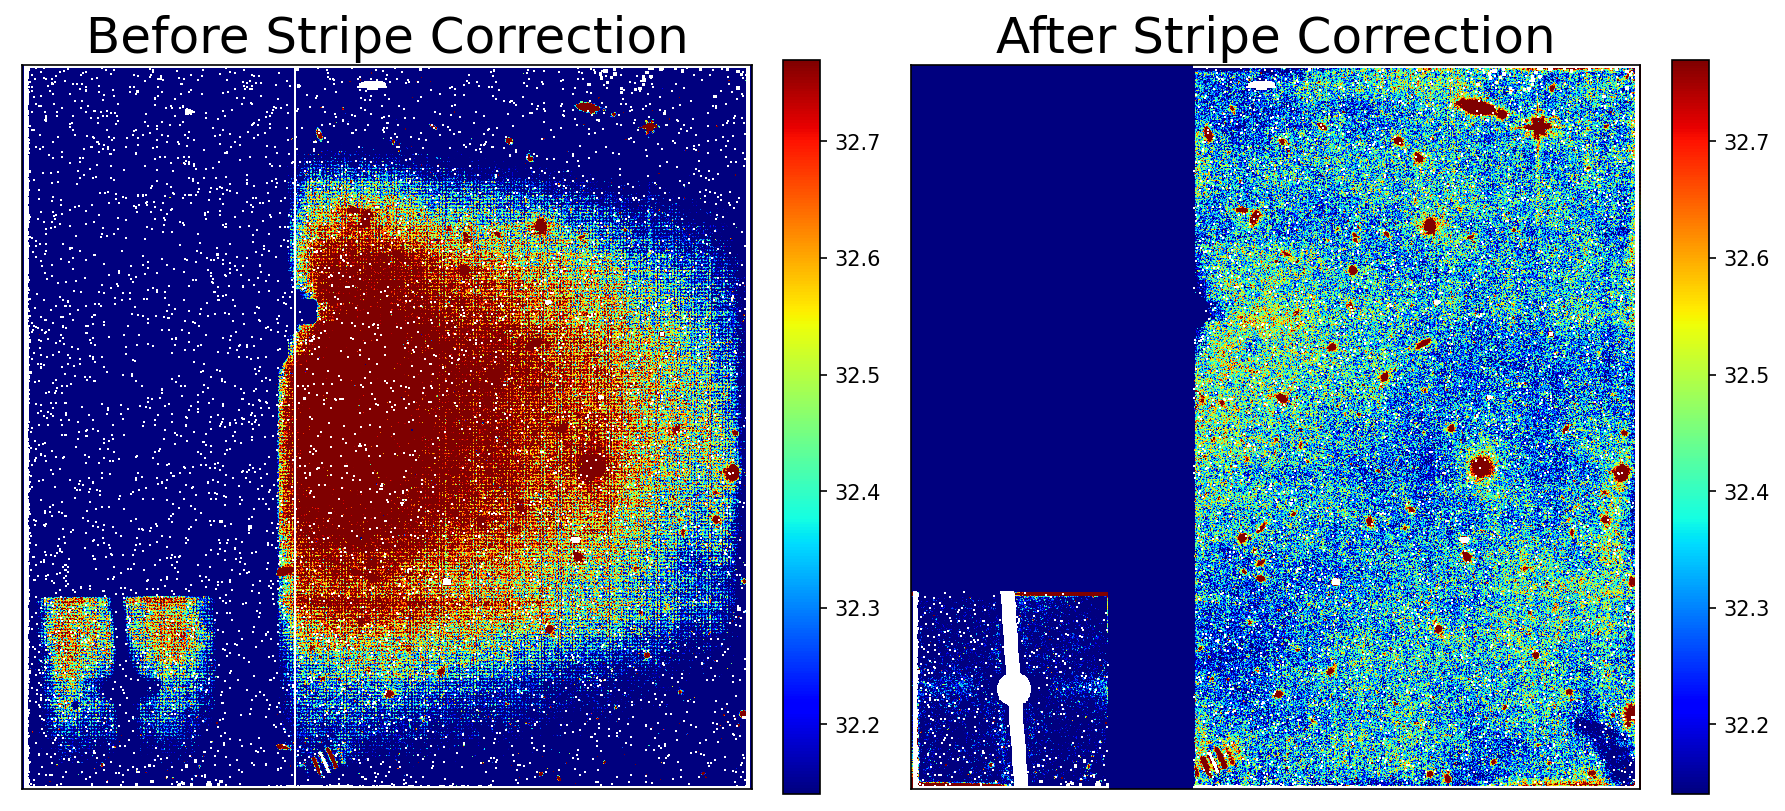

Saving output png to: /mnt/C/JWST/COSMOS/MIRI/F770W/jw01727009001_02201_00003_mirimage/stripe_corrected_image.png


<Figure size 640x480 with 0 Axes>

In [6]:
a.remove_pink_noise()

In [4]:
a.modify_DQ_array_for_lyot()

Detector reading: image
No EXTNAME found for this HDU
HDU extension name: SCI
HDU extension name: ERR
HDU extension name: DQ
HDU extension name: AREA
HDU extension name: VAR_POISSON
HDU extension name: VAR_RNOISE
HDU extension name: VAR_FLAT
HDU extension name: ASDF


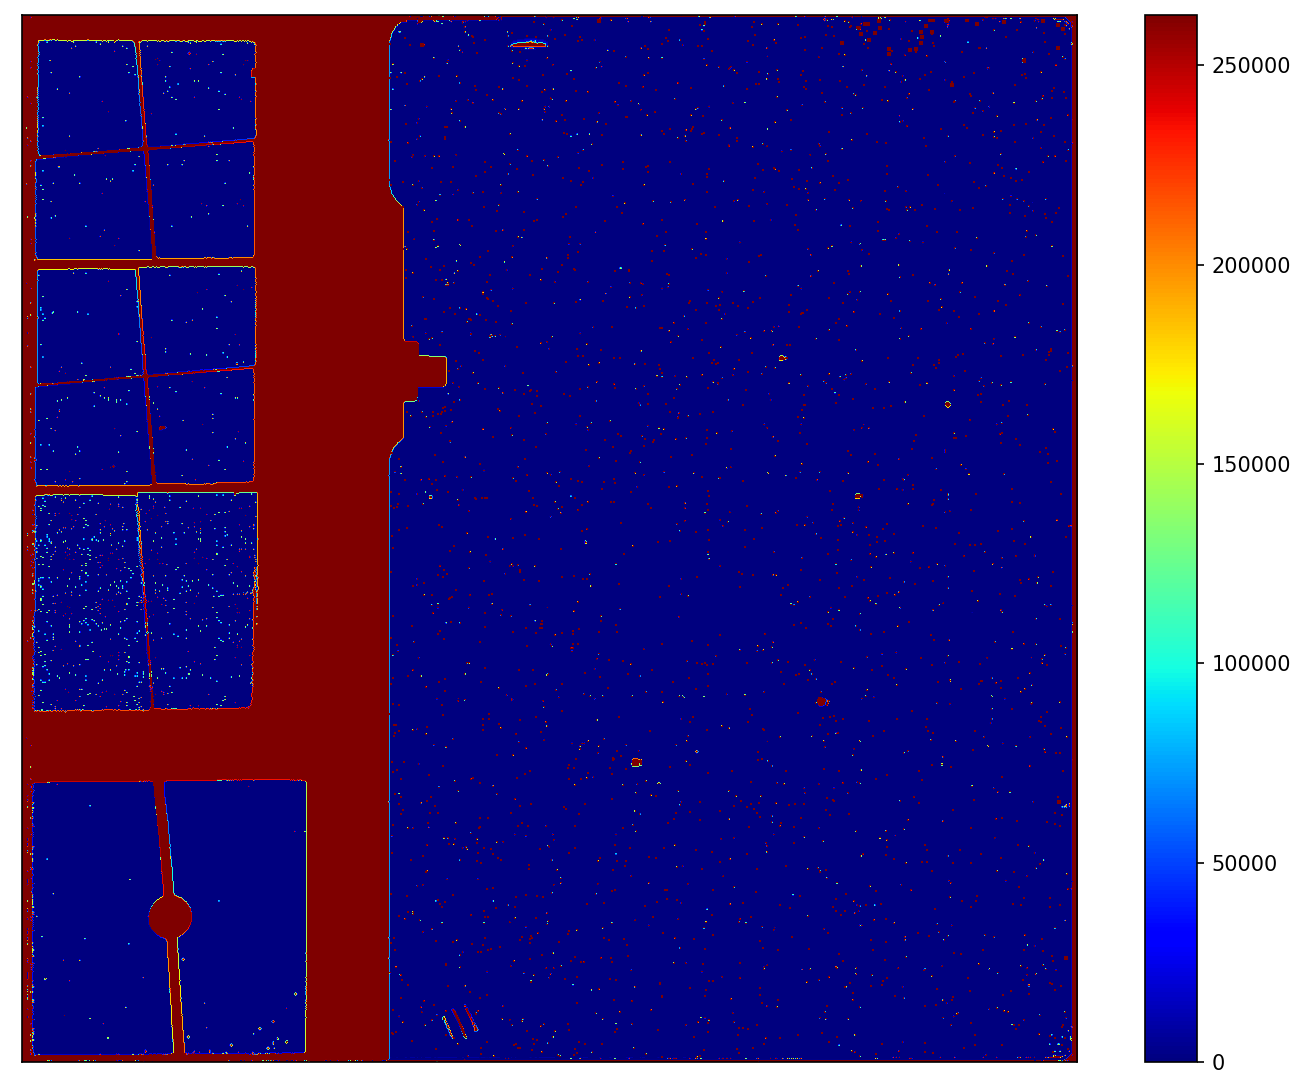

Detector reading: image
No EXTNAME found for this HDU
HDU extension name: SCI
HDU extension name: ERR
HDU extension name: DQ
HDU extension name: AREA
HDU extension name: VAR_POISSON
HDU extension name: VAR_RNOISE
HDU extension name: VAR_FLAT
HDU extension name: ASDF


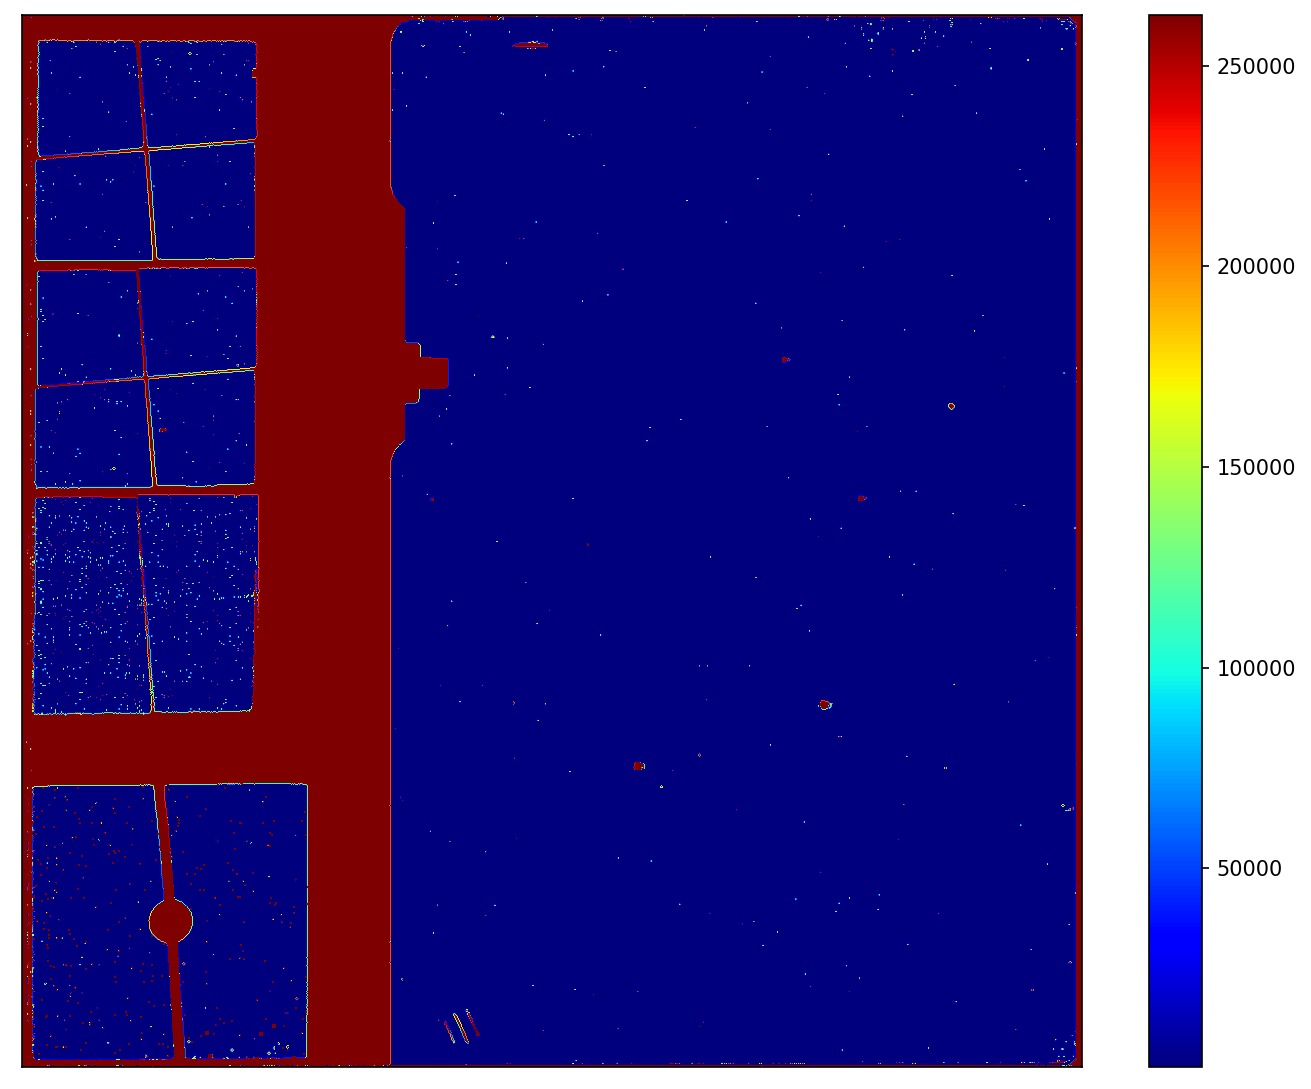

In [9]:
# image_visualization(fits_reader("/mnt/C/JWST/COSMOS/MIRI/F770W/jw01727009001_02201_00003_mirimage/jw01727009001_02201_00003_mirimage_cor.fits")['image']['DQ'])
image_visualization(fits_reader("/mnt/C/JWST/COSMOS/MIRI/F770W/jw01727009001_02201_00002_mirimage/jw01727009001_02201_00002_mirimage_cor_main_cal.fits")['image']['DQ'])
image_visualization(fits_reader("/mnt/C/JWST/COSMOS/MIRI/F770W/jw01727009001_02201_00002_mirimage/jw01727009001_02201_00002_mirimage_cor_lyot_cal.fits")['image']['DQ'])